Nom Etudiant 1: 21106550
<br>
Nom Etudiant 2: 21241759

# TME 2.2 : Median String


## Partie A : Recheche de pattern (motifs) en permettant des variations

Les motifs que nous cherchons dans les sequences d'ADN peuvent contenir quelques variations ou mutations. Nous allons developpé dans cet partie differents algoritmes pour la recherche de motifs variables. 

1\. Comme dans le TME precedent, nous alons d'abord générer des données atificielles pour pouvoir tester les algorithmes. Faire une fonction pour générer `t` séquences artificielles de taille `n`. Implantez dans chaque séquence un motif de taille `k` à des positions aléatoires avec `v` substitutions choisies aléatoirement.

In [1]:
import random

nuc = ('A', 'C', 'G', 'T')

k=4 #taille de motif
v=1 #nb de positions variable dans le motif
t=3 #nb de sequences
n=10 #longuer des sequence

def insertMotif(sequence, motif, position):
    return sequence[:position] + motif + sequence[position:]

def generateRandomSequence(n:int, upper=False):
    """
    Même chose hein
    """
    sequence = "".join([random.choice(nuc) for _ in range(n)])
    if upper:
        return sequence
    return sequence.lower()

def modifierMotif(motif:str, nbpos:int,  upper=False):
    """
    Modifie nbpos positions d'un motif aléatoirement 
    entrée motif: motif à modifier
    entrée nbpos: nombre de positions
    entrée upper : bool, si True les nucléotides modifiés seront minuscule, False majuscule
    sortie motifM: motif modifié
    """
    motifM = list(motif)

    nbPos_real = min(nbpos, len(motif))
    allPos = list(range(len(motif)))

    for _ in range(nbPos_real):
        index = random.choice(range(len(allPos)))
        changeIndex = allPos[index]
        del allPos[index]

        nv_L = generateRandomSequence(1, upper)
        motifM[changeIndex] = nv_L
    return "".join(motifM)


def implantMotifVar(k, v, t, n):
    """
    Génère des séquences aléatoires et les implante des motifs variables (un motif par séquence)
    entrée k: taille du motif
    entrée v: nombre de variations
    entrée t : nombre de séquences 
    entrée n : longueur des séquences
    sortie DNA : matrice de dimension txn avec les motifs implantés
    REMARQUE : La taille totale des séquences plus motif doit être égal à t, pensez à générer de séquence aléatoire de taille t-k pour pouvoir implanter un motif de taille k
    """
    
    sequences = []

    base_motif = generateRandomSequence(k)
    print('motif : ' + str(base_motif))
    for _ in range(t):
        base_seq = generateRandomSequence(n - k)
        changed_motif = modifierMotif(base_motif, v)
        sequences.append(insertMotif(base_seq, changed_motif, random.choice(range(len(base_seq)))))
    
    return sequences

adn = implantMotifVar(k, v, t, n)
print (adn)


tcaagaaaca
motif : gcag
['gctgatccgg', 'tgcagccgcg', 'tgaacgcagt']


2\. Visualisation de motifs. Nous pouvons visualiser les motifs à l'aide des outils de LOGO https://weblogo.berkeley.edu/logo.cgi. Executer votre fonction de generation de motif variable, extraire les motifs et visulise-le à l'aide de webLogo. Utiliser les parametre ci-dessous.


In [2]:
k=8 #taille de motif
v=2 #nb de positions variable dans le motif
t=10 #nb de sequences
n=10 #longuer des sequence

adn = implantMotifVar(k, v, t, n)
print(adn)

motif : gcaagcgc
['gaacgcgcga', 'gcaagagcga', 'agcatgcgag', 'gcaggcgcaa', 'cgcaagggcc', 'gcaagaactt', 'agcaaacgca', 'ttctagcgct', 'ccccagcgct', 'ggaagcccgt']


In [3]:
# >> ['ttcgtgctca', 'atcgtgcttg', 'ctcgtcctca', 'tgcgcgccca', 'tgacgctctt', 'tcgcgcgctg', 'gtcgggctct', 'tcgcggccat', 'tggcgctgtg', 'gtagcgctca']

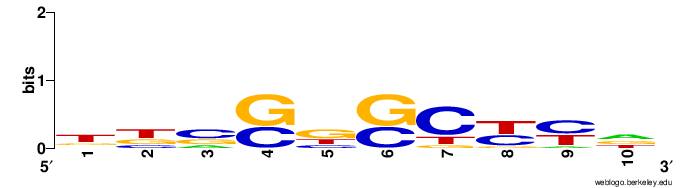

3\. Implémentez l'algorithme _"Median String Search"_ pour chercher des motifs de taille variable. Tester le sur les jeux de données générés precedement. Vous devez éliminer les motifs peu complexe pour éviter les calculs inutiles. Pensez à eliminer tous les motifs ayant une formation diferents de motifs attendues, par exemple, les motifs ayant deux bases repetés comme ACACACAC, etc.  

In [34]:
from itertools import product

def removeLowComplexe(motifs, size):
    """
    Eleve les motifs peu complexe ayant 
    entrée motifs: dictionnaire de motifs, clé=motif, valeur = fréquence d'observation
    sortie motifsClean: dictionnaire de motifs sans les motifs peu complexe.
    """
    motifsClean = []
    twoLetterCombs = ["".join(tup) for tup in list(product(["A", "T", "G", "C"], repeat=2))]
    for motif in [m.upper() for m in motifs]:
        if motif.count("A") > size or motif.count("T") > size or motif.count("G") > size or motif.count("C") > size:
            continue
        if True in [x*3 in motif for x in twoLetterCombs]:
            print(motif)
            continue
        motifsClean.append(motif)
        
    return motifsClean
    
      
# Genere tous les K-mers de taille K allant de AAA... à TTT...
allkmers = product(nuc, repeat=k)
kmers = [''.join(kmer) for kmer in list(allkmers)]

print(len(kmers))
kmersValid = removeLowComplexe(kmers, 4)
print (len(kmersValid))
print (kmersValid[0])



16384
AACACAC
AAGAGAG
AATATAT
ACACACA
ACACACC
ACACACG
ACACACT
ACGCGCG
ACTCTCT
AGAGAGA
AGAGAGC
AGAGAGG
AGAGAGT
AGCGCGC
AGTGTGT
ATATATA
ATATATC
ATATATG
ATATATT
ATCTCTC
ATGTGTG
CACACAA
CACACAC
CACACAG
CACACAT
CAGAGAG
CATATAT
CCACACA
CCGCGCG
CCTCTCT
CGAGAGA
CGCGCGA
CGCGCGC
CGCGCGG
CGCGCGT
CGTGTGT
CTATATA
CTCTCTA
CTCTCTC
CTCTCTG
CTCTCTT
CTGTGTG
GACACAC
GAGAGAA
GAGAGAC
GAGAGAG
GAGAGAT
GATATAT
GCACACA
GCGCGCA
GCGCGCC
GCGCGCG
GCGCGCT
GCTCTCT
GGAGAGA
GGCGCGC
GGTGTGT
GTATATA
GTCTCTC
GTGTGTA
GTGTGTC
GTGTGTG
GTGTGTT
TACACAC
TAGAGAG
TATATAA
TATATAC
TATATAG
TATATAT
TCACACA
TCGCGCG
TCTCTCA
TCTCTCC
TCTCTCG
TCTCTCT
TGAGAGA
TGCGCGC
TGTGTGA
TGTGTGC
TGTGTGG
TGTGTGT
TTATATA
TTCTCTC
TTGTGTG
15456
AAAACCC


In [18]:
def hamdist(str1:str, str2:str):
	"""
	Calcul la distance de hamming entre deux chaînes de caractères
	entrée str1: chaîne de caractères
	entrée str2: chaîne de caractères
	sortie distance: distance de hamming
	"""
	if len(str1) != len(str2):
		raise Exception("str1 = " + str1 + ", str2 = " + str2)
	return sum([1 for i in range(len(str1)) if str1[i].lower() != str2[i].lower()])

assert hamdist("abcde", "abcdc") == 1
assert hamdist("abc", "def") == 3

def totalDistance(motif:str, sequences, k):
	"""
	Calcul la totalDistance
	entrée motif: sequence consensus
	entrée k: taille du motif 
	entrée sequences: matrice de dimension txn contenant les séquences
	sortie totalDistance: somme de distances de hamming minimales
	"""

	return sum([min([hamdist(motif, seq[i:i+k]) for i in range(len(seq)-k+1)]) for seq in sequences])

assert totalDistance("abc", ["abcde", "dabce", "deabc"], 3) == 0


def MedianStringSearch(allkmers, sequences, k):
	"""
	Implement l'algorithme MedianStringSearch
	entrée allkmers: liste de K-mers valides
	entrée sequences: matrice de dimension txn contenant les séquences
	entrée k: taille du motif 
	sortie bestMotif: le motif que minimise les distances
	sortie bestDistance: la distance minimal
	sortie motifDist: un dictionnaire contenant les motifs et leurs distances
	"""
	bestMotif = allkmers[0]
	motifDist = {}

	for kmer in allkmers:
		currentDist = totalDistance(kmer, sequences, k)
		motifDist[kmer] = currentDist
		if currentDist < motifDist[bestMotif]:
			bestMotif = kmer

	return bestMotif, motifDist[bestMotif], motifDist

In [19]:
print(MedianStringSearch(kmersValid, adn, k))

('CAAGCGC', 14, {'AAACAAA': 40, 'AAACAAC': 38, 'AAACAAG': 39, 'AAACAAT': 40, 'AAACACA': 34, 'AAACACC': 34, 'AAACACG': 32, 'AAACACT': 33, 'AAACAGA': 38, 'AAACAGC': 33, 'AAACAGG': 38, 'AAACAGT': 38, 'AAACATA': 42, 'AAACATC': 40, 'AAACATG': 41, 'AAACATT': 41, 'AAACCAA': 39, 'AAACCAC': 36, 'AAACCAG': 39, 'AAACCAT': 39, 'AAACCCA': 32, 'AAACCCG': 32, 'AAACCCT': 33, 'AAACCGA': 33, 'AAACCGC': 30, 'AAACCGG': 35, 'AAACCGT': 34, 'AAACCTA': 38, 'AAACCTC': 37, 'AAACCTG': 39, 'AAACCTT': 39, 'AAACGAA': 33, 'AAACGAC': 34, 'AAACGAG': 32, 'AAACGAT': 34, 'AAACGCA': 27, 'AAACGCC': 28, 'AAACGCG': 25, 'AAACGCT': 26, 'AAACGGA': 33, 'AAACGGC': 34, 'AAACGGG': 33, 'AAACGGT': 33, 'AAACGTA': 35, 'AAACGTC': 36, 'AAACGTG': 33, 'AAACGTT': 34, 'AAACTAA': 41, 'AAACTAC': 41, 'AAACTAG': 40, 'AAACTAT': 42, 'AAACTCA': 35, 'AAACTCC': 35, 'AAACTCG': 33, 'AAACTCT': 34, 'AAACTGA': 40, 'AAACTGC': 35, 'AAACTGG': 41, 'AAACTGT': 39, 'AAACTTA': 42, 'AAACTTC': 42, 'AAACTTG': 41, 'AAACTTT': 42, 'AAAGAAA': 38, 'AAAGAAC': 32, 'AAAGAAG

In [20]:
#Apliquez l'algoritme MedianStringSearch sur les sequences du brin complementaire

def reverseComplement(seq):
    seq_dict = {'a':'t','t':'a','g':'c','c':'g'}
    return "".join([seq_dict[base] for base in reversed(seq)])

adn_rev = [reverseComplement(seq) for seq in adn]
adn_rev


['tcgcgcgttc',
 'tcgctcttgc',
 'ctcgcatgct',
 'ttgcgcctgc',
 'ggcccttgcg',
 'aagttcttgc',
 'tgcgtttgct',
 'agcgctagaa',
 'agcgctgggg',
 'acgggcttcc']

In [21]:
print(MedianStringSearch(kmersValid, adn_rev, k))

('GCGCTTG', 14, {'AAACAAA': 58, 'AAACAAC': 55, 'AAACAAG': 50, 'AAACAAT': 52, 'AAACACA': 52, 'AAACACC': 52, 'AAACACG': 48, 'AAACACT': 47, 'AAACAGA': 54, 'AAACAGC': 50, 'AAACAGG': 50, 'AAACAGT': 50, 'AAACATA': 49, 'AAACATC': 49, 'AAACATG': 43, 'AAACATT': 46, 'AAACCAA': 54, 'AAACCAC': 53, 'AAACCAG': 49, 'AAACCAT': 48, 'AAACCCA': 49, 'AAACCCG': 47, 'AAACCCT': 43, 'AAACCGA': 53, 'AAACCGC': 49, 'AAACCGG': 50, 'AAACCGT': 48, 'AAACCTA': 45, 'AAACCTC': 45, 'AAACCTG': 41, 'AAACCTT': 40, 'AAACGAA': 53, 'AAACGAC': 53, 'AAACGAG': 49, 'AAACGAT': 47, 'AAACGCA': 46, 'AAACGCC': 46, 'AAACGCG': 43, 'AAACGCT': 42, 'AAACGGA': 53, 'AAACGGC': 50, 'AAACGGG': 49, 'AAACGGT': 47, 'AAACGTA': 49, 'AAACGTC': 48, 'AAACGTG': 43, 'AAACGTT': 44, 'AAACTAA': 51, 'AAACTAC': 46, 'AAACTAG': 44, 'AAACTAT': 46, 'AAACTCA': 48, 'AAACTCC': 45, 'AAACTCG': 43, 'AAACTCT': 43, 'AAACTGA': 48, 'AAACTGC': 41, 'AAACTGG': 43, 'AAACTGT': 45, 'AAACTTA': 45, 'AAACTTC': 43, 'AAACTTG': 38, 'AAACTTT': 43, 'AAAGAAA': 56, 'AAAGAAC': 54, 'AAAGAAG

## Partie B : Recherche de motifs variable sur vos données

Chercher sur le fichier "Sequence_by_Peaks_G*.fasta" contiens les regions de peak trouvé par ChipSeq, qui contient probablement le Facteur de Transcription que nous cherchons. Apliquer l'alogorithm Median Sting pour chercher les motifs dans votre fichier "Sequence_by_Peaks_G*. Il faut bien evidement enlever les motifs peu complexe.

In [22]:
import time

k=7
feq=10
top= 50
genome = "Sequence_by_Peaks_3.fasta"



def readFasta(fastaFileName):
    """
    Read a fasta file
    entrée fastaFileName: nom du fichier fasta
    sortie sequences: liste contenant toutes les sequences du fichier
    """
    sequence = []
    file = open(genome, "r")
    sequence = []
    for s in file:
        if s[0] != ">":
            sequence.append(s.strip().upper())

    return sequence

sequences = readFasta(genome)


In [23]:
bestMotif, bestDistance, motifDist = MedianStringSearch(kmersValid, sequences[0:3], k)
print (bestMotif, bestDistance)

GGCACCG 1
